## Predict Wine Quality 

According to the exploratory data analysis results (see EDA.Rmd), four main features have been chosen from 11 attributes:

1. volatile.acidity
2. citric.acid
3. sulphates
4. alcohol

Two other attributes also have relatively high correlation coefficients, so they should be further investigated.

5. density
6. total.sulfur.dioxide



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the file and create a pandas dataframe
data = pd.read_csv('wineQualityReds.csv', index_col=0)

In [3]:
# create the initial feature list
feature_cols_ini = ['volatile.acidity', 'citric.acid', 'sulphates', 'alcohol']

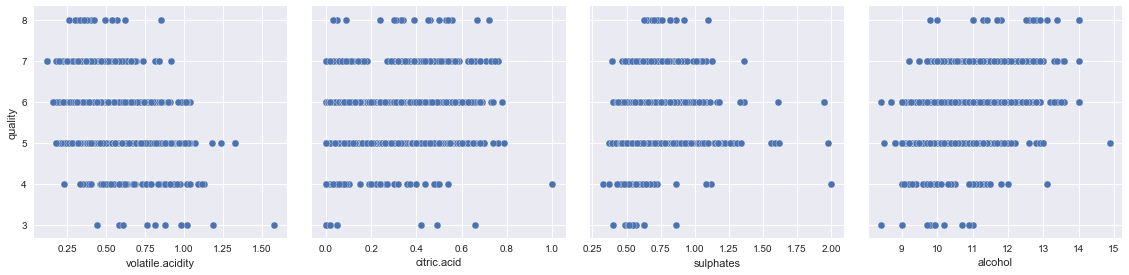

In [4]:
# plot the four main features v.s. quality
sns.pairplot(data, x_vars = feature_cols_ini, y_vars = 'quality', size=4)
sns.plt.show()

In [5]:
# feature scaling
from sklearn import preprocessing
std_scale_ini = preprocessing.StandardScaler().fit(data[feature_cols_ini])
df_std_ini = std_scale_ini.transform(data[feature_cols_ini])

In [6]:
# create X (features) and y (response)
X_ini = pd.DataFrame(data = df_std_ini, columns = feature_cols_ini)    
X_ini.index += 1
y = data['quality']

In [7]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.cross_validation import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X_ini, y, test_size=0.25)

/Users/shengweng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Model Selection
Select the best model using 10-fold cross validation.

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
# Decision Tree
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
DT_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
DT_score

/Users/shengweng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.57554326451977755

In [11]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
NB_score = cross_val_score(clf2, X_cv, y_cv, cv=10, scoring='accuracy').mean()
NB_score

0.56093414945220188

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv, y_cv, cv=10, scoring='accuracy').mean()
LR_score

0.55821176455421262

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
RF_score = cross_val_score(clf4, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.61554823110483992

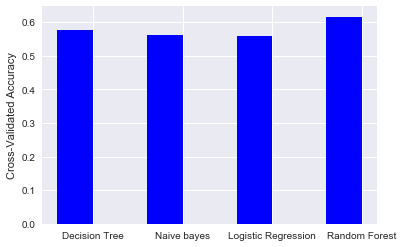

In [15]:
# plot and compare the scores
x_axis = np.arange(4)
y_axis = [DT_score, NB_score, LR_score, RF_score]
plt.bar(x_axis, y_axis, width=0.4, color='blue')
plt.xticks(x_axis + 0.4/2., ('Decision Tree', 'Naive bayes', 'Logistic Regression', 'Random Forest'))
plt.ylabel('Cross-Validated Accuracy')

The default performance of **Random Forest** outperforms other models.

### Feature Selection
Study the impact of 'density' and 'total.sulfur.dioxide' on wine quality using cross validation.

In [17]:
# include 'density'
feature_cols1 = ['volatile.acidity', 'citric.acid', 'sulphates', 'alcohol', 'density']

In [18]:
# feature scaling and cross validation score
std_scale1 = preprocessing.StandardScaler().fit(data[feature_cols1])
df_std1 = std_scale1.transform(data[feature_cols1])
X1 = pd.DataFrame(data = df_std1, columns = feature_cols1)    
X1.index += 1
X_cv1, X_test1, y_cv1, y_test1 = train_test_split(X1, y, test_size=0.25)
cross_val_score(clf4, X_cv1, y_cv1, cv=10, scoring='accuracy').mean()

/Users/shengweng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.62723684257616141

In [19]:
# include 'total.sulfur.dioxide'
feature_cols2 = ['volatile.acidity', 'citric.acid', 'sulphates', 'alcohol', 'total.sulfur.dioxide']

In [20]:
# feature scaling and cross validation score
std_scale2 = preprocessing.StandardScaler().fit(data[feature_cols2])
df_std2 = std_scale2.transform(data[feature_cols2])
X2 = pd.DataFrame(data = df_std2, columns = feature_cols2)    
X2.index += 1
X_cv2, X_test2, y_cv2, y_test2 = train_test_split(X2, y, test_size=0.25)
cross_val_score(clf4, X_cv2, y_cv2, cv=10, scoring='accuracy').mean()

0.63497050687125822

Therefore, adding **'total.sulfur.dioxide'** into the feature list can improve the algorithm performance.

### Parameters Tuning
Use GridSearchCV to tune parameters in random forest.

In [54]:
# the current classifier
clf = RandomForestClassifier()
feature_cols = ['volatile.acidity', 'citric.acid', 'sulphates', 'alcohol', 'total.sulfur.dioxide']
std_scale = preprocessing.StandardScaler().fit(data[feature_cols])
df_std = std_scale.transform(data[feature_cols])
X = pd.DataFrame(data = df_std, columns = feature_cols)    
X.index += 1
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)
cross_val_score(clf, X_cv, y_cv, cv=10, scoring='accuracy').mean()

/Users/shengweng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.65266959614072317

In [46]:
# define the parameter values that should be searched
n_range = np.arange(10, 100, 10)
min_samples_split_i = [2,3]
min_samples_leaf_i = [1,2,3]
param_grid = dict(n_estimators = n_range, min_samples_split = min_samples_split_i, min_samples_leaf = min_samples_leaf_i)

In [47]:
# instantiate the grid, fit the grid with data
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_cv, y_cv)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3], 'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [55]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.679733110926
{'min_samples_split': 2, 'n_estimators': 90, 'min_samples_leaf': 1}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [60]:
# the final logistic regression classifier with optimal parameters
clf = RandomForestClassifier(n_estimators=90)
clf.fit(X_cv, y_cv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [61]:
# make class predictions for the testing set 
# calculate accuracy
from sklearn import metrics
y_pred_class = clf.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.6825


### Conclusion
Random forest is chosen to be the best model to predict the wine quality. The test accuracy of prediction is 0.591. 'total.sulfur.dioxide' together with 'volatile.acidity', 'citric.acid', 'sulphates', and 'alcohol' are the major features that determine the wine quality.